### EDA

Querying the characteristics of EDU data.

Tasks:
- How many Positive, Negative, Neutral EDUs are there?
- Proportion
- Check the length of the EDUs
    - Make a histogram according to length of p,n,z. 
- How does LR and LSTM works? (Other notebook)
    
__Notation:__

* Positive (p): 1
* Negative (n): -1
* Neutral (z): 0


In [204]:
import labeled_functions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors

In [205]:
X, y = labeled_functions.load_labeled_neutrals(path=r"/Users/ekremguzelyel/Desktop/Assignments/Research/MLLab-IIT/Fall_19/edu/active_learning/")

Labeled Data loaded.


In [268]:
# Vectorize using CountVectorizer
token = r"(?u)\b[\w\'/]+\b"
def vectorize(ngram=(1,1), stop=["the","a","of","and","br","to"]):
    return CountVectorizer(token_pattern=token, binary=True, ngram_range=ngram, stop_words=stop)

vectorizer_one = vectorize(stop=["a","of","and","br","to"])
# vectorizer_two = vectorize(ngram=(1,2), stop=["a","of","and","br","to"])
# vectorizer_the = vectorize(stop=["the","a","of","and","br","to"])

X_vector = vectorizer_one.fit_transform(X)

__Important Note:__
At first, I used "the" in stop_words. However, now that I realized "the" is an indicator of superlative, it should be included in the vector count. Especially sequence model may give better results with this new addition.

---------------
__Talking about Numbers__

In [207]:
label, count = np.unique(y, return_counts=True)
print("Overall # of EDUs: %s \nPositive: %s \nNegative: %s \nNeutral: %s" %(len(X), count[2], count[0], count[1]))

Overall # of EDUs: 5201 
Positive: 1611 
Negative: 1697 
Neutral: 1893


__The Length of EDUs__

In [279]:
EDU_counts=[]
for i in enumerate(X_vector.todense()):
    EDU_counts.append(len(i[1].nonzero()[1]))

# Check counts vs. labels
EDU_counts[:10], y[:10]

([11, 10, 5, 5, 10, 5, 7, 7, 16, 8],
 array([ 0, -1,  0,  1,  0,  0,  0,  0,  1, -1]))

In [280]:
print("Overall Mean: %s\nPositive EDU Mean: %s\nNegative EDU Mean: %s\nNeutral EDU Mean: %s"
    %(np.mean(EDU_counts),
      np.mean([EDU_counts[x] for x in range(len(y)) if y[x]==1]),
      np.mean([EDU_counts[x] for x in range(len(y)) if y[x]==-1]),
      np.mean([EDU_counts[x] for x in range(len(y)) if y[x]==0])))

Overall Mean: 8.403191693905018
Positive EDU Mean: 8.45437616387337
Negative EDU Mean: 8.143783146729522
Neutral EDU Mean: 8.592181722134178


In [272]:
print("Overall Median: %s\nPositive EDU Median: %s\nNegative EDU Median: %s\nNeutral EDU Median: %s"
    %(np.median(EDU_counts),
      np.median([EDU_counts[x] for x in range(len(y)) if y[x]==1]),
      np.median([EDU_counts[x] for x in range(len(y)) if y[x]==-1]),
      np.median([EDU_counts[x] for x in range(len(y)) if y[x]==0])))

Overall Median: 8.0
Positive EDU Median: 8.0
Negative EDU Median: 7.0
Neutral EDU Median: 8.0


In [273]:
print("Overall Max: %s\nPositive EDU Max: %s\nNegative EDU Max: %s\nNeutral EDU Max: %s"
    %(np.max(EDU_counts),
      np.max([EDU_counts[x] for x in range(len(y)) if y[x]==1]),
      np.max([EDU_counts[x] for x in range(len(y)) if y[x]==-1]),
      np.max([EDU_counts[x] for x in range(len(y)) if y[x]==0])))

Overall Max: 90
Positive EDU Max: 41
Negative EDU Max: 73
Neutral EDU Max: 90


In [274]:
print("Overall Min: %s\nPositive EDU Min: %s\nNegative EDU Min: %s\nNeutral EDU Min: %s"
    %(np.min(EDU_counts),
      np.min([EDU_counts[x] for x in range(len(y)) if y[x]==1]),
      np.min([EDU_counts[x] for x in range(len(y)) if y[x]==-1]),
      np.min([EDU_counts[x] for x in range(len(y)) if y[x]==0])))

Overall Min: 1
Positive EDU Min: 1
Negative EDU Min: 1
Neutral EDU Min: 1


In [275]:
# Example check
X[3:8], y[3:8]

(['who sensitises her character to perfection . ',
  "that the greatest desire of the wretched duo is to become `` true '' american ? ",
  'grounded on a beautiful tropical island ',
  'where you drink too much cheap beer ',
  'i sometimes enjoy really lousy movie ... .those '],
 array([1, 0, 0, 0, 0]))

/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


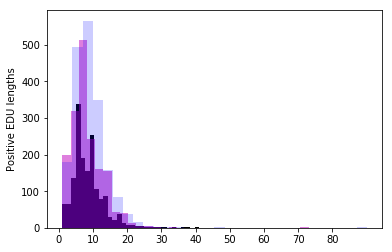

In [290]:
# Positive
pos_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==1]
plt.hist(pos_fig, normed=False, bins=30, color=['k'])
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.ylabel("Positive EDU lengths")
# plt.show()

# Negative
neg_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==-1]
plt.hist(neg_fig, normed=False,alpha=0.5, bins=30, color=['m'])
# plt.xticks([0,10,20,30,40,50,60,70,80])
# plt.ylabel("Negative EDU lengths")
# plt.show()

# Neutral
neut_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==0]
plt.hist(neut_fig, normed=False,alpha=0.2, bins=30, color=['b'])
# plt.xticks([0,10,20,30,40,50,60,70,80])
# plt.ylabel("Neutral EDU lengths")
plt.show()

/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


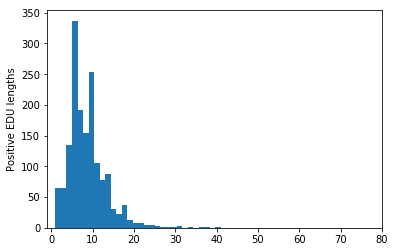

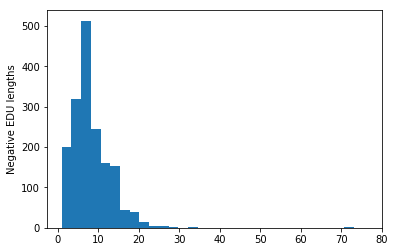

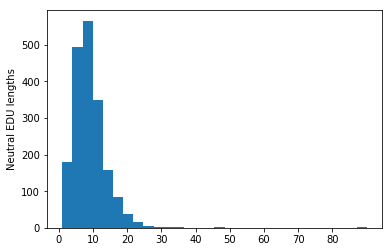

In [278]:
# Positive
pos_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==1]
plt.hist(pos_fig, normed=False, bins=30)
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.ylabel("Positive EDU lengths")
plt.show()

# Negative
neg_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==-1]
plt.hist(neg_fig, normed=False,alpha=1, bins=30)
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.ylabel("Negative EDU lengths")
plt.show()

# Neutral
neut_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==0]
plt.hist(neut_fig, normed=False,alpha=1, bins=30)
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.ylabel("Neutral EDU lengths")
plt.show()

/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


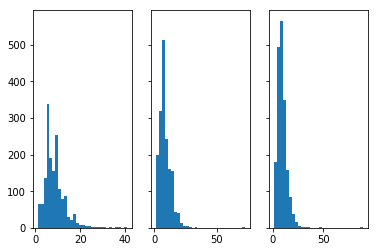

In [276]:

# Generate a normal distribution, center at x=0 and y=5
pos_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==1]
neg_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==-1]
neut_fig = [EDU_counts[x] for x in range(len(y)) if y[x]==0]

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=False)

# plt.ylabel("# of Occurences")
axs[0].hist(pos_fig, normed=False, bins=30)
axs[1].hist(neg_fig, normed=False, bins=30)
axs[2].hist(neut_fig, normed=False, bins=30)

plt.show()


# [EDU_counts[x] for x in range(len(y)) if y[x]==1]


### Findings:
1. The number of positive, negative, and neutral EDUs are close to each other.
    - This is a good sign!
2. Negative EDUs tend to be shorter than positive and neutrals.
3. Keyword "the" affects length of an EDU 0.4 in average.
    - And, in theory, it might help sequence models.

--------
---------
--------